# CFD Results Post-Process and Validation

**The final step for the development of a CFD simulation for a problem of interest is to process and examine the validity of the obtained numerical results (a.k.a post-processing and validation step). This steps requires an in-depth engineering knowledge about the fundamentals of the physical problem of interest. Thus, the value of investing time in understanding the fundamental physics of the flow, once again is highlighted here. This process is done starting from general inspection on CFD simulation results and ends with more detail validation process.**

The obtained results for 2D laminar flow over a cylinder with Reynolds of 25 is processed and discussed in this section. The first general rule of thumb to check the convergence of a CFD simulation is to check the residual and error values for key flow variables, such as continuity, velocity and pressure. In OpenFoam the residual values for velocity components and pressure along with error values for continuity are printed out at each time step as set in the `controlDict` dictionary file. A sample of time report is shown below for the last time step `t=4000`:

```C++
Time = 4000

smoothSolver:  Solving for Ux, Initial residual = 2.23423e-06, Final residual = 6.46319e-07, No Iterations 2
smoothSolver:  Solving for Uy, Initial residual = 1.70963e-06, Final residual = 8.89283e-07, No Iterations 1
GAMG:  Solving for p, Initial residual = 9.62711e-07, Final residual = 5.44333e-08, No Iterations 6
time step continuity errors : sum local = 6.78047e-12, global = -1.06824e-12, cumulative = -1.57049e-08
ExecutionTime = 3558.15 s  ClockTime = 3762 s

forceCoeffs forceCoeffs1 output:
    Cm    = 4.3501e-07
    Cd    = 1.89774
    Cl    = -4.76935e-06
    Cl(f) = -1.94966e-06
    Cl(r) = -2.81968e-06
```

The residual value of each variable denotes how the the numerical value of that variable is differing from the previous time step. Lower value of residual indicates the obtained numerical value of the variable of interest has converged to a specific value. In this simulation this is true for `U_x`, `U_y` and `p` that have residual values by order of `1e-7`. The reported `continuity errors` defines how the obtained relevant variables are satisfying the continuity equation. The global continuity error with order of `1e-8` in this problem confirms that continuity equation is being satisfied.

Once the simulation is ran in OpenFoam the user can make and plot the trend of evolution for different variables at the end of the simulations. Running the command `foamLog simpleFoam` before starting the iterations and then at the end running the command `foamLog log` inside the main working directory will make a history of log files for different flow field variables inside a new directory called `logs`. Changing the directory into `logs` folder and running `gnuplot` command, user can plot the obtained numerical residuals. This process was done for simulation with Re=25 and generated log files were visualized using the following commands:

```C++
gnuplot
gnuplot> set xlabel "Iterations"          #sets label of x-axis
gnuplot> set ylabel "Residuals"           #sets label of y-axis
gnuplot> set logscale y                   #sets logarithmic scale of y axis
gnuplot> plot './contLocal_0' with lines, './UxFinalRes_0' with lines, './pFinalRes_0' with lines #plots residuals
```   

<img src="./Images/residuals_Re25.png" width="500" align="middle">
</br>
Fig. 1 The residual values of `U_x` and `p` with the continuity error values versus time steps.

The general decreasing trend of the residual and error values confirm that the numerical solution of the conservation/governing equations are converging to specific final values. This decreasing trend is the first necessary, but not sufficient, general criteria to confirm the convergence of the CFD simulation.

The second step is to visualize dimensionless form of the important variables within the CFD domain. This visualization step can be problem specific and should be performed over an adequate plane of choice. In OpenFoam the post-processing is recommended to be done in ParaView, which is the recommended post-processor package of OpenFoam. Running the command

```C++
paraFoam
```
in the terminal, while locating in the working directory of the simulation will simply read all the obtained numerical results and get it ready for post-processing. Once the user ran `paraFoam` command and the software load up, hitting the `Apply` bottom under `properties` window will load the numerical results.

For most of the problems contour of normalized velocity or pressure, over a horizontal or vertical plane at the center of the CFD domain, is a good start point. For the current problem, since the entire domain is two dimensional and planar, it would make the entire domain the best candidate for the post-processing plane. User should now define the normalized variable of interest that needs to be visualized. Defining variables can be done via `Filters/Data Analysis/Calculator`. This command will open a new panel under propertise, where users can define their variable of interest. Name the variable (i.e. `Ux/U0`) and enter the required formula for the normalized variable of interest (i.e. `U_x/1`) and hit `Apply`. This will calculate the normalized streamwise velocity with free stream velocity within entire CFD domain for all the time steps and visualize the results for `t=0`. Using the `play` bottom users can see the formation of laminar boundary layer and wake around and in the back of the cylinder, from `t=0` to `t=1000` across the domain:

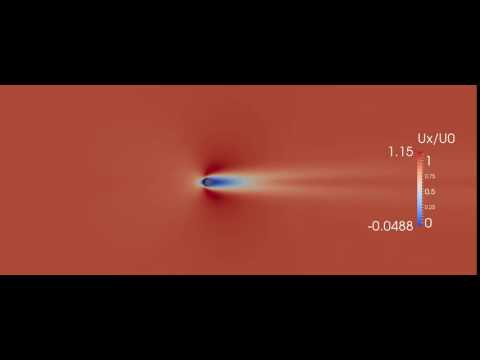

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Xz6ec2FfxNM")

Fig. 2 - Animation for temporal evolution of normalized streamwise velocity contours with the free stream velocity for flow over a cylinder with Reynolds numbers of 25.

Fig. 2 visualizes the normalized streamwise velocity with free stream for flows with Reynolds numbers of 25. The Flow enters the domain with normalized velocity of 1. Due to the imposed no slip boundary conditions over the surface of cylinder, the velocity instantly decrease to zero on the nose of the cylinder and a laminar boundary layer starts to form and grow around the cylinder's surface. Moving slightly further downstream at the top and bottom edges of the cylinder, where the formed laminar boundary layer is exposed to the free stream velocity, a shear layer will form and results in to an accelerated flow region, colored with dark red, at these two points. These two accelerated regions can be though as continues and attached vortices to the cylinder's surface.
Since the body of cylinder, as a blunt body, is blocking the incoming flow a decelerated region of flow would form right at the back of the cylinder. This area is the place where the flow recirculates and two counter rotating vortices, as a result of flow moving over the top and bottom curved surfaces of cylinder, would form here. At low Reynolds number this region will stay attached to the cylinder. Moving further downstream the cylinder, as a result of a momentum gradient between the formed shear layer at the to top and bottom edges of the cylinder and the recirculation zone behind the cylinder, a wake with velocity deficit is created and is shown by dark blue color. Moving further downstream and getting closer to the outlet boundary this wake recovers and the velocity become very close to the freestream velocity at the inlet of the CFD domain.
Comparison between obtained numerical results for the normalized velocity contours for different Reynolds number reveals that as Reynolds number increases, effect of inertial forces become dominant within the flow field, the area of recirculation region just behind the cylinder and local acceleration on top of bottom of the cylinder increases. This lead into a large momentum gradient between to regions and eventually the wake first becomes unsteady around Re=50 as visualized in Fig 3. and start to have a small lateral up-and-down motion. Further increase in Reynolds number (i.e. around Re=100) lead into the separation of the wake and process of vortex shedding from the cylinder. This unsteady phenomena is a well-known physical process that can be investigated using unsteady numerical models.

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("POzXJChw6K0")

Fig. 3 - Animation for temporal evolution of normalized streamwise velocity contours with the free stream velocity for flow over a cylinder with Reynolds numbers of 50.

**After performing the general post-processing steps, the user need to perform more detail oriented post-processing to confirm the validity of the CFD simulation. This stage can be a state-of-the-art. Comparing the numerical results against the theory (discussed earlier) or any other available experimental results is the final stage of post-processing. It is extremely important to calculate the correct corresponding numerical variables and compare them against the experimental or other numerical data.**

In order to validate the numerical results from these simulations the numerically predicted drag coefficients of the cylinder were compared against the corresponding experimentally measure drag coefficient values from [here](https://www.researchgate.net/publication/232025673_Computations_of_the_drag_coefficients_for_low-Reynolds-number_flow_past_rings) for different Reynolds numbers. The reason behind choosing the drag coefficient is that the cylinder is significantly affected by the pressure forces acting on the body of cylinder and generating a wake behind the object. It is worth to mention that in the laminar flows the effect of viscous forces on the drag force and coefficient on the cylinder is minimum.

The value of the drag coefficient of the cylinder is defined as:

$$ C_D~=~\frac{F_D}{\frac{1}{2} . \rho_{ref} . V_{ref} ^2 . A_{proj}}. $$

In this equation $F_D$, the total drag force due to pressure and viscous forces within the flow acting on the cylinder's surface in the streamwise direction, is normalized with the available momentum within the undisturbed incoming flow that could be exerted on the cylinder. The value of this momentum is calculated using $\rho_{ref}$ as the reference density of the flow, which is the density of the flow. $V_{ref}$ as the undisturbed streamwise flow velocity in the inlet and $A_{proj}$, which is the projected area of the cylinder surface. For a two-dimensional cylinder the projected area is equal to the diameter of the cylinder. This is the area where pressure and viscus forces are acting on the cylinder in the streamwise direction. It should be noted that the pressure and viscous forces in the perpendicular direction to streamwise direction cancel each other. Hence, the forces and areas that they act on does not have any contribution to the drag force and coefficient.

As discussed earlier in the "Simulation Setup" section user can take advantage of pre-written functions and libraries to calculate and report drag force coefficient values. The "forceCoeffs" function, added to `controlDict` dictionary file located in `\system folder`, takes "cylinder" walls as the patch and calculate the forces on in the defined directions. The three available directions are `liftDir`, `dragDir` and `pitchAxis`. Based on the orientation of coordinates in the current CFD-domain the drag force direction is along x-axis (1 0 0), the lift force direction is along y-axis (0 1 0) and pitchAxis is along z-direction (0 0 1). The center of origin called `CodR` is located at (0 0 0). Reference variables are defined as the free stream flow properties. In this case study reference values of velocity, density and diameter are all equal to 1. However, the value of reference area "Aref" should be defined differently! Fundamentally, the reference area to calculate the drag force coefficient is defined as the total "effective" area that the force of interest is acting against. In case of the flow over a cylinder the fluid forces on the body of cylinder can be visualized as shown in the Fig. 3:

<img src="./Images/Aref_viz.png" width="350">
Fig.3 - Schematic of total fluid force and it's decomposition on the body of cylinder.

Each force component can be decomposed into two components in the horizontal and vertical directions shown with red and green colors respectively. Due to the symmetry of the geometry the vertical components of the forces cancel each other. Therefore, the total drag force is the summation of all horizontal forces that are acting against the projected area along the cylinder's wall as visualized in the zoom-in view of Fig. 1. This area is defined as the reference area `Aref` and is equal to diameter times the depth of the cylinder. For the current CFD domain the diameter is 1 [m] and the created depth of the mesh via "blockMesh" is 2.8 [m]. Therefore, the value of the reference area is 2.8 $[m^2]$. Note that for a purely 2D problem (with no depth in mesh) the value of depth is considered to be unity. Therefore, in that case the value of the reference area is 1 $[m^2]$. Following table provides a summary of comparison between the experimentally measured and numerically calculated drag coefficients values:

| Reynolds #     | $C_D$ Experiment| $C_D$ Numerical | Relative Error [%]|
| :-------------:|:-------------:  | :-----:|:--------:|
| 10             | 2.89            | 2.89   |0.00|
| 25             | 1.87            | 1.90   |1.60|
| 50             | 1.47            | 1.46   |0.68|
| 100            | 1.34            | 1.20   |10.10|
Table 1. Comparison between the experimentally measured and numerically predicted a cylinder drag coefficient for different Reynolds number.

Table 1 compares the experimentally [measured](https://www.researchgate.net/publication/232025673_Computations_of_the_drag_coefficients_for_low-Reynolds-number_flow_past_rings) and numerically calculated drag coefficient values for case study of laminar flow over a cylinder and states the corresponding value of the relative error percentage. As shown in this table the value of the relative error percentage are below 2% for cases of Reynolds number below 10. The numerical and experimental values are in a close agreement with each other for each corresponding Reynolds number. It should be noted the disagreement between the corresponding drag coefficient values start to increase for Reynolds number of 100. The reason behind this large error is that at this Reynolds number the effect of inertial forces become more significant and flow becomes unsteady. Therefore, steady model can not simulate this flow field accurately. Furthermore, it should be noted that larger time interval should be picked to obtained accurate value for the numerically estimated drag force coefficient. After first few hundred iterations the convergence trend to the final value becomes very slow.

At this stage one can conclude that this CFD numerical simulation is validated to study steady laminar flow over a cylinder. Therefore, these simulations can be used for similar or more complex problems, such as unsteady flow over a cylinder or three dimensional laminar steady or unsteady flow over a sphere. This can be done via correct implementation in changing the corresponding solver, models and/or boundary conditions.